# GOAL2: Use the cleaned dataset with Pandas to perform EDA 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from pyspark.sql import SparkSession
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## For the EDA part of the project we will use Pandas to handle the already cleaned dataset

In [2]:
# Import the csv file
df = pd.read_csv("../Clean_Data/2024/clean_dataset_legislative_2024.csv", sep=";")

In [3]:
# Show top 5 rows
df.head(5)

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Numéro_de_panneau_18,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats
0,1,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
1,1,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
2,1,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
3,1,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2
4,1,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2


## Number of columns and rows of the cleaned Dataset

In [4]:
# Shape of the dataset
df.shape

(31392, 181)

The dataset has 181 different columns with unique and repeated informations for different candidates:
Unique columns:
- Code_département
- Libellé_département
- Code_commune
- Libellé_commune
- Inscrits
- Votants
- Pourcentage_Votants
- Abstentions
- Pourcentage_Abstentions
- Exprimés
- Pourcentage_Exprimés/inscrits
- Pourcentage_Exprimés/votants
- Blancs
- Pourcentage_Blancs/inscrits
- Pourcentage_Blancs/votants
- Nuls
- Pourcentage_Nuls/inscrits
- Pourcentage_Nuls/votants
- Nombre_candidats

Repeated columns (X being a value between 1 and 18):

- Numéro_de_panneau X
- Nuance_candidat X
- Nom_candidat X
- Prénom_candidat X
- Sexe_candidat X
- Voix_X
- Pourcentage_Voix/inscrits X
- Pourcentage_Voix/exprimés X
- Elu_X

## List of the columns with NULL values

In [126]:
# Perform data check
list_null_columns = [col for col in df.columns if df[col].isna().any()]

In [127]:
list_null_columns

['Numéro_de_panneau_2',
 'Nuance_candidat_2',
 'Nom_candidat_2',
 'Prénom_candidat_2',
 'Sexe_candidat_2',
 'Voix_2',
 'Pourcentage_Voix/inscrits_2',
 'Pourcentage_Voix/exprimés_2',
 'Numéro_de_panneau_3',
 'Nuance_candidat_3',
 'Nom_candidat_3',
 'Prénom_candidat_3',
 'Sexe_candidat_3',
 'Voix_3',
 'Pourcentage_Voix/inscrits_3',
 'Pourcentage_Voix/exprimés_3',
 'Numéro_de_panneau_4',
 'Nuance_candidat_4',
 'Nom_candidat_4',
 'Prénom_candidat_4',
 'Sexe_candidat_4',
 'Voix_4',
 'Pourcentage_Voix/inscrits_4',
 'Pourcentage_Voix/exprimés_4',
 'Numéro_de_panneau_5',
 'Nuance_candidat_5',
 'Nom_candidat_5',
 'Prénom_candidat_5',
 'Sexe_candidat_5',
 'Voix_5',
 'Pourcentage_Voix/inscrits_5',
 'Pourcentage_Voix/exprimés_5',
 'Numéro_de_panneau_6',
 'Nuance_candidat_6',
 'Nom_candidat_6',
 'Prénom_candidat_6',
 'Sexe_candidat_6',
 'Voix_6',
 'Pourcentage_Voix/inscrits_6',
 'Pourcentage_Voix/exprimés_6',
 'Numéro_de_panneau_7',
 'Nuance_candidat_7',
 'Nom_candidat_7',
 'Prénom_candidat_7',
 'S

## The NULL values don't represent missing data but the fact the smaller cities dont have as much candidates as others

In [7]:
# reset_index: Converts the result (which is currently a Series with "Nombre_candidats" as the index) back into a DataFrame
count_by_candidates = df.groupby("Nombre_candidats").size().reset_index(name="Number of Cities")

## A large number of cities have a maximum of 3 candidates in the secound round

In [8]:
count_by_candidates

,Nombre_candidats,Number of Cities
0,1,14
1,2,28026
2,3,3132
3,4,174
4,5,22
5,6,8
6,7,1
7,8,8
8,9,1
9,10,1


In [128]:
count_by_candidates = df.groupby("Nombre_candidats").agg(
    Number_of_Cities= ("Libellé_commune", "size"),
    Average_Inscrits = ("Inscrits", "mean")
).reset_index()

## As we can see there are more candidates in cities with more people registered to vote (except for cities where there is just one candidate)
Which can mean that the bigger cities have a lot of candidates because there are themselved divided in smaller circonscriptions

In [10]:
count_by_candidates

,Nombre_candidats,Number_of_Cities,Average_Inscrits
0,1,14,3548.857143
1,2,28026,1117.415471
2,3,3132,1901.227011
3,4,174,11015.637931
4,5,22,46795.181818
5,6,8,40157.375000
6,7,1,87289.000000
7,8,8,122088.125000
8,9,1,68957.000000
9,10,1,400366.000000


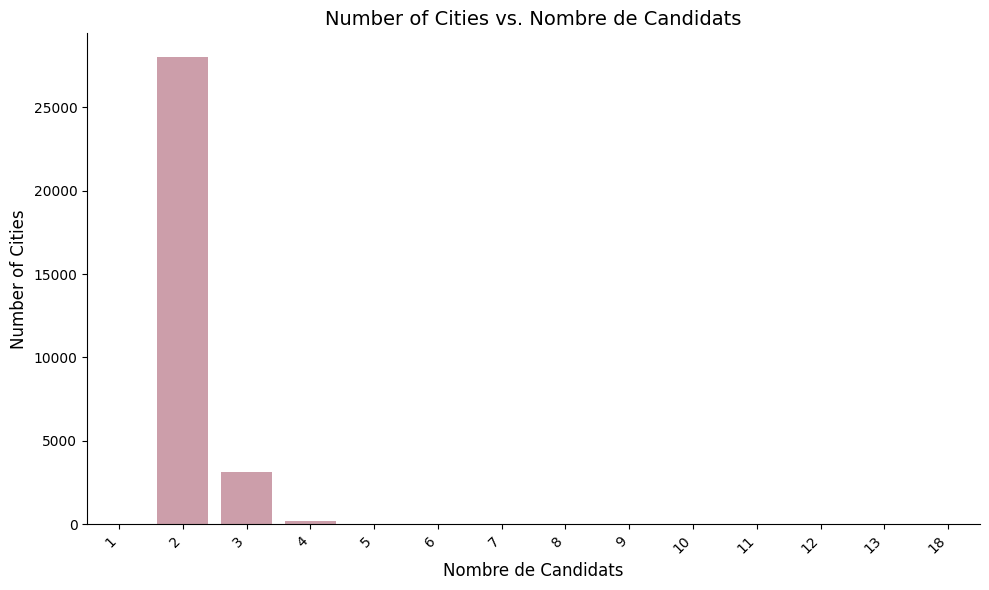

In [130]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x="Nombre_candidats", y="Number_of_Cities", data=count_by_candidates, color='#d496a7') 
plt.xlabel('Nombre de Candidats', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.title('Number of Cities vs. Nombre de Candidats', fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the appearance (optional)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()


## The most second turn confrontations that happen are either duels or triangles followed by 4 candidates

In [131]:
df[df["Nombre_candidats"] > 7]

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats,Libellé_Région
3167,13,Bouches-du-Rhône,13055,Marseille,400366,258783,64.64,141583,35.36,242247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,10,Provence-Alpes-Côte d'Azur
10580,31,Haute-Garonne,31555,Toulouse,196238,135652,69.13,60586,30.87,132891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12,Occitanie
11133,33,Gironde,33063,Bordeaux,166625,114734,68.86,51891,31.14,110547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8,Nouvelle-Aquitaine
11688,34,Hérault,34172,Montpellier,101456,64608,63.68,36848,36.32,60348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8,Occitanie
12063,35,Ille-et-Vilaine,35238,Rennes,68957,48070,69.71,20887,30.29,47211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,9,Bretagne
14964,44,Loire-Atlantique,44109,Nantes,106987,73390,68.60,33597,31.40,71985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12,Pays de la Loire
16184,49,Maine-et-Loire,49007,Angers,93562,62424,66.72,31138,33.28,60815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,11,Pays de la Loire
17221,51,Marne,51454,Reims,101169,59940,59.25,41229,40.75,57011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8,Grand Est
20039,59,Nord,59350,Lille,122500,81459,66.50,41041,33.50,77341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,13,Hauts-de-France
21539,63,Puy-de-Dôme,63113,Clermont-Ferrand,73641,47958,65.12,25683,34.88,46696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,8,Auvergne-Rhône-Alpes


## In the biggest cities in France happen multiple confrontations because these cities have cut in different areas called circonscriptions for the elections

## Add the region column

In [13]:
# Use mapping to add the regions of the departement
departements_regions = {
    "01": "Auvergne-Rhône-Alpes",
    "02": "Hauts-de-France",
    "03": "Auvergne-Rhône-Alpes",
    "04": "Provence-Alpes-Côte d'Azur",
    "05": "Provence-Alpes-Côte d'Azur",
    "06": "Provence-Alpes-Côte d'Azur",
    "07": "Auvergne-Rhône-Alpes",
    "08": "Grand Est",
    "09": "Occitanie",
    "10": "Grand Est",
    "11": "Occitanie",
    "12": "Occitanie",
    "13": "Provence-Alpes-Côte d'Azur",
    "14": "Normandie",
    "15": "Auvergne-Rhône-Alpes",
    "16": "Nouvelle-Aquitaine",
    "17": "Nouvelle-Aquitaine",
    "18": "Centre-Val de Loire",
    "19": "Nouvelle-Aquitaine",
    "2A": "Corse",
    "2B": "Corse",
    "21": "Bourgogne-Franche-Comté",
    "22": "Bretagne",
    "23": "Nouvelle-Aquitaine",
    "24": "Nouvelle-Aquitaine",
    "25": "Bourgogne-Franche-Comté",
    "26": "Auvergne-Rhône-Alpes",
    "27": "Normandie",
    "28": "Centre-Val de Loire",
    "29": "Bretagne",
    "30": "Occitanie",
    "31": "Occitanie",
    "32": "Occitanie",
    "33": "Nouvelle-Aquitaine",
    "34": "Occitanie",
    "35": "Bretagne",
    "36": "Centre-Val de Loire",
    "37": "Centre-Val de Loire",
    "38": "Auvergne-Rhône-Alpes",
    "39": "Bourgogne-Franche-Comté",
    "40": "Nouvelle-Aquitaine",
    "41": "Centre-Val de Loire",
    "42": "Auvergne-Rhône-Alpes",
    "43": "Auvergne-Rhône-Alpes",
    "44": "Pays de la Loire",
    "45": "Centre-Val de Loire",
    "46": "Occitanie",
    "47": "Nouvelle-Aquitaine",
    "48": "Occitanie",
    "49": "Pays de la Loire",
    "50": "Normandie",
    "51": "Grand Est",
    "52": "Grand Est",
    "53": "Pays de la Loire",
    "54": "Grand Est",
    "55": "Grand Est",
    "56": "Bretagne",
    "57": "Grand Est",
    "58": "Bourgogne-Franche-Comté",
    "59": "Hauts-de-France",
    "60": "Hauts-de-France",
    "61": "Normandie",
    "62": "Hauts-de-France",
    "63": "Auvergne-Rhône-Alpes",
    "64": "Nouvelle-Aquitaine",
    "65": "Occitanie",
    "66": "Occitanie",
    "67": "Grand Est",
    "68": "Grand Est",
    "69": "Auvergne-Rhône-Alpes",
    "70": "Bourgogne-Franche-Comté",
    "71": "Bourgogne-Franche-Comté",
    "72": "Pays de la Loire",
    "73": "Auvergne-Rhône-Alpes",
    "74": "Auvergne-Rhône-Alpes",
    "75": "Île-de-France",
    "76": "Normandie",
    "77": "Île-de-France",
    "78": "Île-de-France",
    "79": "Nouvelle-Aquitaine",
    "80": "Hauts-de-France",
    "81": "Occitanie",
    "82": "Occitanie",
    "83": "Provence-Alpes-Côte d'Azur",
    "84": "Provence-Alpes-Côte d'Azur",
    "85": "Pays de la Loire",
    "86": "Nouvelle-Aquitaine",
    "87": "Nouvelle-Aquitaine",
    "88": "Grand Est",
    "89": "Bourgogne-Franche-Comté",
    "90": "Bourgogne-Franche-Comté",
    "91": "Île-de-France",
    "92": "Île-de-France",
    "93": "Île-de-France",
    "94": "Île-de-France",
    "95": "Île-de-France",
    "971": "Outre-Mer",
    "972": "Outre-Mer",
    "973": "Outre-Mer",
    "974": "Outre-Mer",
    "975": "Outre-Mer",
    "976": "Outre-Mer",
    "987": "Outre-Mer",
    "988": "Outre-Mer",
    "ZX": "Outre-Mer",
    "ZZ": "Étranger",  
}

In [132]:
# Adding a "0" value before the one digit numbers
df["Code_département"] = df["Code_département"].astype(str).apply(lambda x: "0" + x if len(x) == 1 else x)

In [133]:
uniques_departements = df["Code_département"].unique()
print(uniques_departements)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '971' '972'
 '973' '974' '975' '976' '987' '988' 'ZX' 'ZZ']


In [135]:
# Making sure there is no missing keys in the mapping dictionnary

missing_keys = []

for departement in uniques_departements:
    # Convert integer departments to strings with leading zeros if necessary
    if departement not in departements_regions:
        missing_keys.append(departement)

print("Missing keys:", missing_keys)

Missing keys: []


In [136]:
# Create the new Region column with mapping
df['Libellé_Région'] = df['Code_département'].map(departements_regions)

## Check duplicates in the dataset


In [18]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

## Check the data types of the columns

In [19]:
#Check data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31392 entries, 0 to 31391
Data columns (total 182 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Code_département               31392 non-null  object 
 1    Libellé_département            31392 non-null  object 
 2    Code_commune                   31392 non-null  object 
 3    Libellé_commune                31392 non-null  object 
 4    Inscrits                       31392 non-null  int64  
 5    Votants                        31392 non-null  int64  
 6    Pourcentage_Votants            31392 non-null  float64
 7    Abstentions                    31392 non-null  int64  
 8    Pourcentage_Abstentions        31392 non-null  float64
 9    Exprimés                       31392 non-null  int64  
 10   Pourcentage_Exprimés/inscrits  31392 non-null  float64
 11   Pourcentage_Exprimés/votants   31392 non-null  float64
 12   Blancs                        

## Check number of unique values

In [20]:
# Check number of unique values
list_unique = df.nunique()

## Important statistics on the numerical features of the dataset

In [21]:
df.describe()

,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,Pourcentage_Exprimés/inscrits,Pourcentage_Exprimés/votants,Blancs,Pourcentage_Blancs/inscrits,...,Pourcentage_Voix/exprimés_16,Numéro_de_panneau_17,Voix_17,Pourcentage_Voix/inscrits_17,Pourcentage_Voix/exprimés_17,Numéro_de_panneau_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Nombre_candidats
count,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,31392.000000,...,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.00,1.0,31392.000000
mean,1380.240443,919.589673,72.605132,460.650771,27.394905,869.002071,68.256304,94.006233,38.069859,3.215389,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.117482
std,6682.696414,4331.296619,7.253418,2445.147631,7.253402,4114.293203,7.324949,3.952343,181.590414,2.377227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391799
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,1.000000
25%,169.000000,125.000000,69.130000,42.000000,23.290000,117.000000,64.540000,92.150000,4.000000,1.660000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
50%,376.000000,272.000000,72.940000,100.000000,27.060000,255.000000,68.515000,94.830000,11.000000,2.700000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
75%,935.000000,666.250000,76.710000,263.250000,30.870000,628.000000,72.470000,96.610000,28.000000,4.270000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,2.000000
max,687417.000000,459856.000000,100.000000,227561.000000,100.000000,435557.000000,100.000000,100.000000,18628.000000,46.150000,...,5.11,11.0,10039.0,1.46,2.3,12.0,21784.0,3.17,5.0,18.000000


## There are a lot of things that can be extracted from the statistics but we will take it features by features

## But this could be interesting is to visualize statistics about the genders in the candidates

# EDA for gender statistics (univariate analysis):


### First we have to get all the unique candidates

There are suppose to be: 1094 unique candidates in the second tour of this election according to the official website: https://www.vie-publique.fr/en-bref/294804-legislatives-2024-second-tour-les-6-et-7-juillet

In [139]:
# Create a new temporary dataset to store the values we wanna proceed in the analysis
df_unique_candidates = pd.concat([
                                 df['Nom_candidat_' + str(i)] + ' ' + 
                                 df['Prénom_candidat_' + str(i)] + '#' +
                                 df['Sexe_candidat_' + str(i)] + '#' +
                                 df['Nuance_candidat_' + str(i)] + '#' +
                                 df['Libellé_Région']
                                 for i in range(1, 19)], ignore_index=True)

# Drop any NaN values
df_unique_candidates.dropna(inplace=True)

# Split the combined data and keep only 'Nom_complet' and 'Sexe'
df_unique_candidates = df_unique_candidates.str.split('#', expand=True)
df_unique_candidates.columns = ['Nom_complet', 'Sexe', 'Nuance', 'Région']

# Count unique values considering Nom_complet and Sexe
unique_candidate_count = df_unique_candidates.drop_duplicates().shape[0] 

# Check if the number of candidates match the reality
print("Number of unique candidates (with gender):", unique_candidate_count)

Number of unique candidates (with gender): 1094


In [122]:
df_unique_candidates = df_unique_candidates.drop_duplicates()

In [123]:
df_unique_candidates.reset_index(drop=True, inplace=True)

## New dataset with the unique second round candidates

In [124]:
df_unique_candidates.head(10)

,Nom_complet,Sexe,Nuance,Région
0,COQUELET Christophe,MASCULIN,ENS,Auvergne-Rhône-Alpes
1,PISANI Florence,FEMININ,UG,Auvergne-Rhône-Alpes
2,GIVERNET Olga,FEMININ,ENS,Auvergne-Rhône-Alpes
3,KOTARAC Andréa,MASCULIN,RN,Auvergne-Rhône-Alpes
4,MAÎTRE Christophe,MASCULIN,RN,Auvergne-Rhône-Alpes
5,DIVE Julien,MASCULIN,LR,Hauts-de-France
6,RAY Nicolas,MASCULIN,LR,Auvergne-Rhône-Alpes
7,MONNET Yannick,MASCULIN,UG,Auvergne-Rhône-Alpes
8,BOVET Jorys,MASCULIN,RN,Auvergne-Rhône-Alpes
9,GIRARD Christian,MASCULIN,RN,Provence-Alpes-Côte d'Azur


## Plot of the gender count and distribution

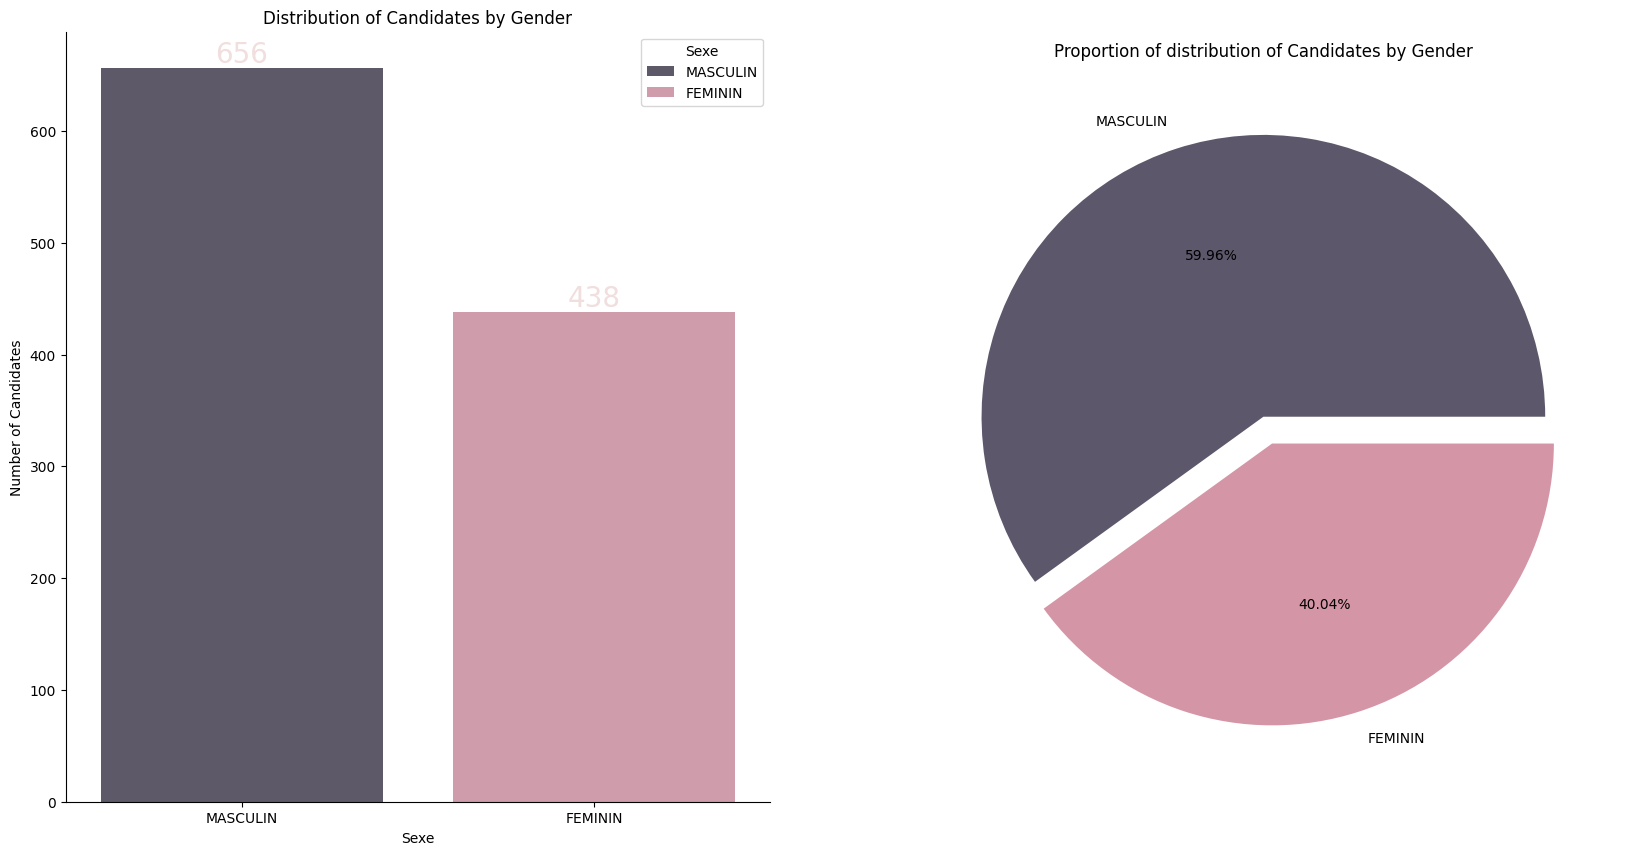

In [125]:
labels = ["MASCULIN", "FEMININ"]

f, ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_unique_candidates['Sexe'], data=df_unique_candidates, hue="Sexe", palette ={'MASCULIN': '#5d576b', 'FEMININ': '#d496a7'}, ax=ax[0], saturation=0.8, stat="count", legend="full")
for container in ax[0].containers:
    ax[0].bar_label(container, color=(241/255,222/255,222/255), size=20) 
# Set title for the first subplot
ax[0].set_title("Distribution of Candidates by Gender")
ax[0].set_ylabel("Number of Candidates") 
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].spines['left'].set_visible(True)

plt.title("Proportion of distribution of Candidates by Gender")
colors = sns.color_palette('pastel')[0:2]
plt.pie(x=df_unique_candidates['Sexe'].value_counts(),labels=labels, explode=[0,0.1], autopct='%2.2f%%', colors =['#5d576b', '#d496a7'])
plt.show()

# EDA for voting statistics (Multivariate analysis):

In [27]:
df.head(5)

,Code_département,Libellé_département,Code_commune,Libellé_commune,Inscrits,Votants,Pourcentage_Votants,Abstentions,Pourcentage_Abstentions,Exprimés,...,Nuance_candidat_18,Nom_candidat_18,Prénom_candidat_18,Sexe_candidat_18,Voix_18,Pourcentage_Voix/inscrits_18,Pourcentage_Voix/exprimés_18,Elu_18,Nombre_candidats,Libellé_Région
0,01,Ain,1001,L'Abergement-Clémenciat,662,494,74.62,168,25.38,476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
1,01,Ain,1002,L'Abergement-de-Varey,228,187,82.02,41,17.98,166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
2,01,Ain,1004,Ambérieu-en-Bugey,8745,5887,67.32,2858,32.68,5348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
3,01,Ain,1005,Ambérieux-en-Dombes,1337,979,73.22,358,26.78,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes
4,01,Ain,1006,Ambléon,98,65,66.33,33,33.67,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,Auvergne-Rhône-Alpes


## Create a new temporary dataset that stores the information of the number of abstainers in the second round per region

In [140]:
abstention_per_region = df.groupby("Libellé_Région").agg(
    Abstention= ("Pourcentage_Abstentions", "mean"),
).reset_index()

In [141]:
abstention_per_region.head(15)

,Libellé_Région,Abstention
0,Auvergne-Rhône-Alpes,25.850904
1,Bourgogne-Franche-Comté,25.628531
2,Bretagne,26.240200
3,Centre-Val de Loire,28.454334
4,Corse,28.989028
5,Grand Est,28.102320
6,Hauts-de-France,29.121121
7,Normandie,28.154747
8,Nouvelle-Aquitaine,26.371415
9,Occitanie,24.519403


## Plot of the abstention rates by region with binning 

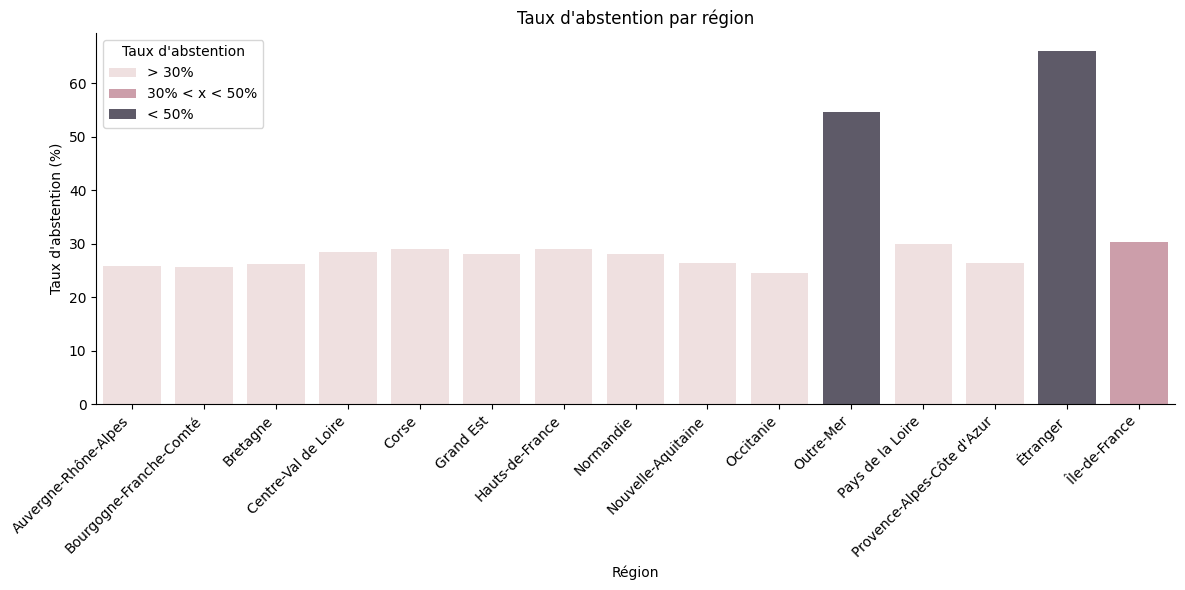

In [142]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed

# Create a new categorical variable based on value ranges
bins = [0, 30, 50, 100]
labels = ['> 30%', '30% < x < 50%', '< 50%']
abstention_per_region["Taux d'abstention"] = pd.cut(abstention_per_region['Abstention'], bins=bins, labels=labels, right=False)

# Create the barplot with 'hue'
sns.barplot(x='Libellé_Région', y='Abstention', hue="Taux d'abstention", data=abstention_per_region, palette={'> 30%': '#f1dede', '30% < x < 50%': '#d496a7', '< 50%': '#5d576b'})

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Région')
plt.ylabel('Taux d\'abstention (%)')
plt.title('Taux d\'abstention par région')

# Show the plot
plt.tight_layout()
plt.show()

## Create a new temporary dataset that stores the information of the number of voters in the second round per region

In [106]:
votants_per_region = df.groupby("Libellé_Région").agg(
    Votants= ("Pourcentage_Votants", "mean"),
).reset_index()

In [107]:
votants_per_region.head(15)

,Libellé_Région,Votants
0,Auvergne-Rhône-Alpes,74.149128
1,Bourgogne-Franche-Comté,74.371511
2,Bretagne,73.759808
3,Centre-Val de Loire,71.545683
4,Corse,71.011000
5,Grand Est,71.897726
6,Hauts-de-France,70.878913
7,Normandie,71.845290
8,Nouvelle-Aquitaine,73.628618
9,Occitanie,75.480655


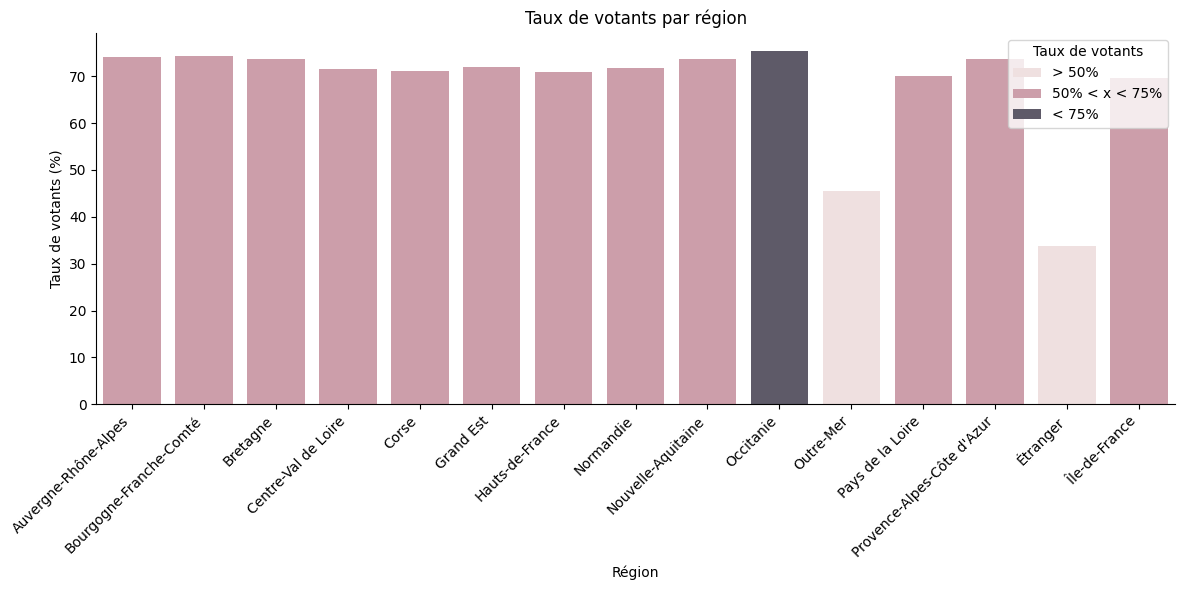

In [144]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed

# Create a new categorical variable based on value ranges
bins = [0, 50, 75, 100]
labels = ['> 50%', '50% < x < 75%', '< 75%']
votants_per_region["Taux de votants"] = pd.cut(votants_per_region['Votants'], bins=bins, labels=labels, right=False)

# Create the barplot with 'hue'
sns.barplot(x='Libellé_Région', y='Votants', hue="Taux de votants", data=votants_per_region, palette={'> 50%': '#f1dede', '50% < x < 75%': '#d496a7', '< 75%': '#5d576b'})

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Région')
plt.ylabel('Taux de votants (%)')
plt.title('Taux de votants par région')

# Show the plot
plt.tight_layout()
plt.show()